In [96]:
import pandas as pd
import spacy

import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
from datasets import load_dataset

dataset = load_dataset("shahxeebhassan/human_vs_ai_sentences")

for k in dataset.keys():
    dataset[k].to_csv(f'../data/{k}_human_vs_ai_sentences.csv', index = False)

Creating CSV from Arrow format: 100%|██████████| 105/105 [00:00<00:00, 226.26ba/s]



    0: Human-written
    1: AI-generated


In [98]:
df = pd.read_csv("../data/train_human_vs_ai_sentences.csv")
df.head(5)

,text,label
0,Another reason why all students should have to...,0
1,Also the Electoral College consists of 538 ele...,0
2,Many countries have made changes in there town...,0
3,I believe the process of choosing a president ...,0
4,A thick cloud of carbon dioxide and heats to h...,0


In [99]:
df['text_len'] = df['text'].str.len()
df['word_count'] = df['text'].str.split(" ").str.len()

length_stats = df.groupby('label')[['text_len', 'word_count']].agg(['mean', 'median', 'std']).round(2)
print(length_stats)

      text_len               word_count              
          mean median    std       mean median    std
label                                                
0       113.69  100.0  71.72      20.55   18.0  13.09
1       118.10  110.0  63.50      19.31   18.0   9.57


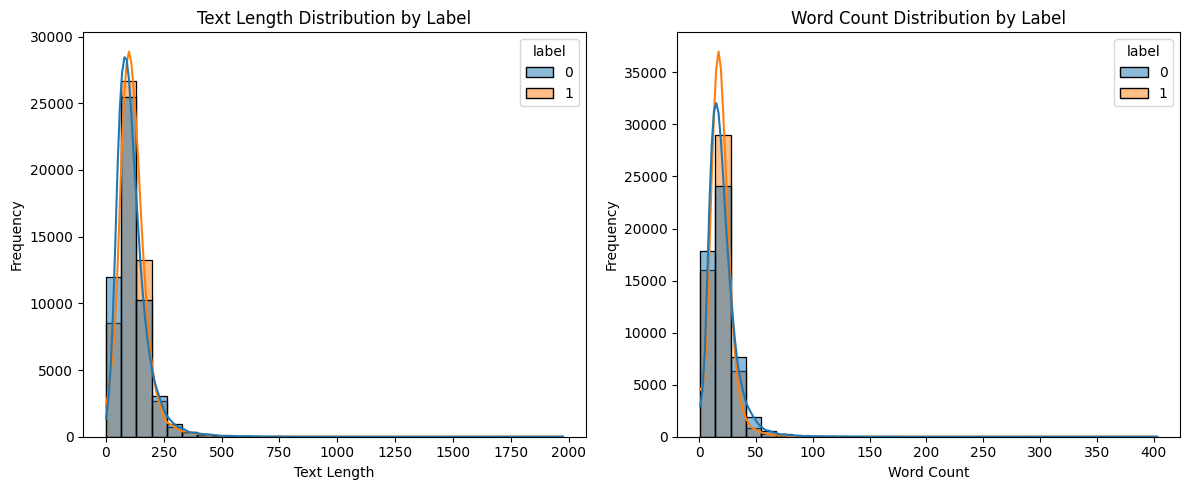

In [100]:


plt.figure(figsize=(12, 5))

# Text length distribution by label
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='text_len', hue='label', bins=30, kde=True)
plt.title('Text Length Distribution by Label')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Word count distribution by label
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='word_count', hue='label', bins=30, kde=True)
plt.title('Word Count Distribution by Label')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [101]:
print(f"Human texts: {(df['label'] == 0).sum()}")
print(f"AI texts: {(df['label'] == 1).sum()}")

Human texts: 52500
AI texts: 52500


In [102]:
df = df[df['word_count'] <= 50]

In [103]:
print(f"Human texts: {(df['label'] == 0).sum()}")
print(f"AI texts: {(df['label'] == 1).sum()}")

Human texts: 51132
AI texts: 51931


## Analysis

In [109]:
#Sample
df = df.sample(1000, random_state=0)

In [113]:
nlp = spacy.load("en_core_web_sm")

rows = []

for _, row in df.iterrows():
    doc = nlp(row.text)

    rows.append({
        "symbol_count": len(row.text),
        "token_count": len(doc),
        "token_len": len(row.text)/len(doc),
        "sentence_count": len(list(doc.sents)),
        "unique_tokens_count": len(set([t.text for t in doc if not t.is_punct])),
        "comma_density": row.text.count(',') / max(len(row.text), 1) * 1000,
        "period_density": row.text.count('.') / max(len(row.text), 1) * 1000
    })

f_df = pd.DataFrame(rows)
f_df = pd.concat([df['label'].reset_index(drop=True), f_df.reset_index(drop=True)], axis=1)


In [114]:
f_df

,label,symbol_count,token_count,token_len,sentence_count,unique_tokens_count,comma_density,period_density
0,0,79,17,4.647059,1,15,12.658228,12.658228
1,1,119,23,5.173913,1,20,8.403361,8.403361
2,0,98,19,5.157895,1,15,10.204082,10.204082
3,1,101,17,5.941176,1,14,9.900990,9.900990
4,0,167,32,5.218750,1,28,0.000000,5.988024
...,...,...,...,...,...,...,...,...
995,0,68,16,4.250000,1,14,14.705882,0.000000
996,0,34,8,4.250000,1,7,0.000000,29.411765
997,0,104,17,6.117647,1,14,0.000000,9.615385
998,0,120,27,4.444444,1,21,0.000000,8.333333


In [115]:
f_df.columns

Index(['label', 'symbol_count', 'token_count', 'token_len', 'sentence_count',
       'unique_tokens_count', 'comma_density', 'period_density'],
      dtype='object')

In [108]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   label                10000 non-null  int64  
 1   symbol_count         10000 non-null  int64  
 2   token_count          10000 non-null  int64  
 3   sentence_count       10000 non-null  int64  
 4   unique_tokens_count  10000 non-null  int64  
 5   comma_density        10000 non-null  float64
 6   period_density       10000 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 547.0 KB


<Axes: xlabel='token_count', ylabel='Count'>

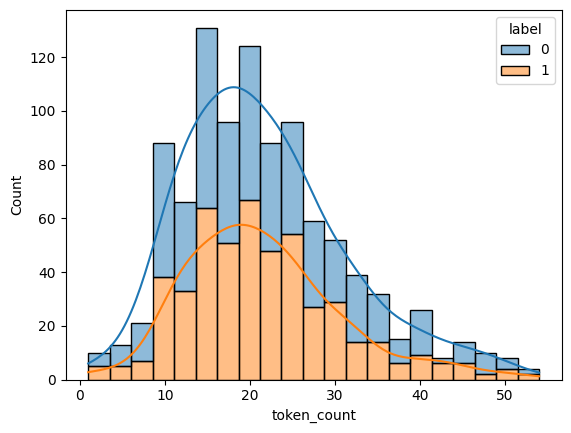

In [120]:
sns.histplot(data=f_df, x='token_count', hue='label', kde=True, multiple='stack')

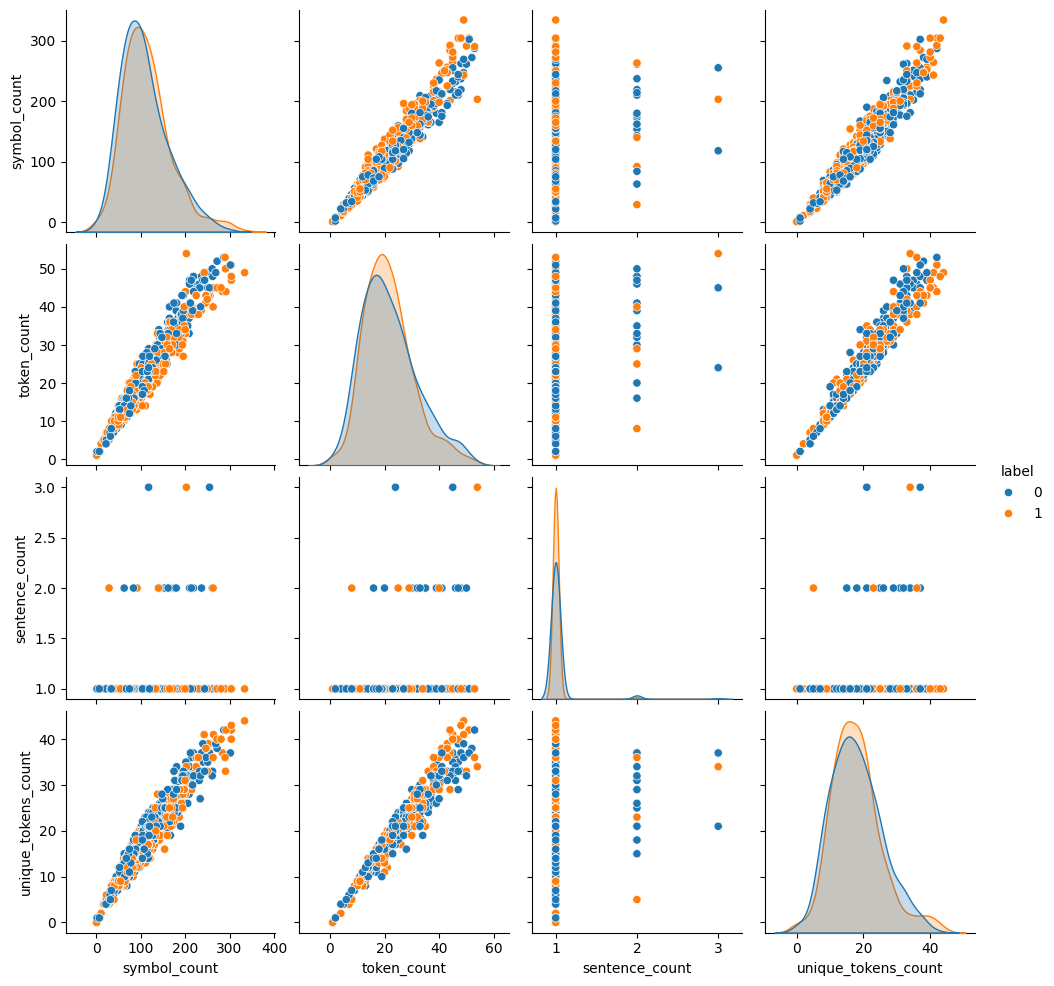

In [124]:
sns.pairplot(f_df, hue='label', vars=['symbol_count', 'token_count', 'sentence_count', 'unique_tokens_count'])
